In [1]:
import numpy as np
import pandas as pd

In [2]:
#to read csv file usimg pandas library
df=pd.read_csv('/Users/nikhil/Desktop/ml projects practice/first placement project/placement.csv')

In [3]:
#view first 5 rows 
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
#we need only three columns cgpa, iq and placement #preprocessing step.

df=df.iloc[:,1:]

In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
#training set = 90 students 
#testing set = 10 students 

#check missiong values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
import matplotlib.pyplot as plt

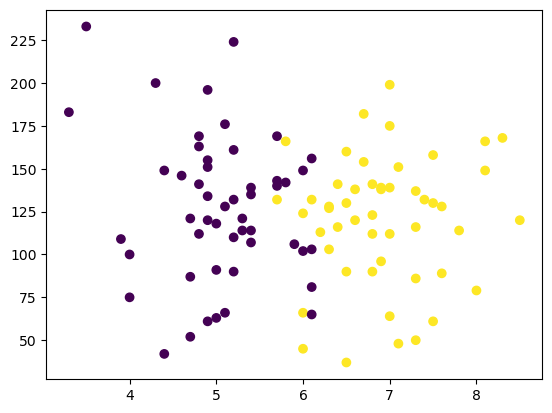

In [8]:
#this step is knownn as eda
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])


In [9]:
#we are going to use logistic regression
#its splits the data and classifies them 
#extract input and output columns
#cgpa, iq = independent variables 
#placement = depemndednt variables


#independent variables
X=df.iloc[:,0:2]

#dependent variable
y=df.iloc[:,-1]


print(X)
print(y)

    cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns]
0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64


In [10]:
#train test split 

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1) #how much percentage will go in test data 

In [11]:
X_train

,cgpa,iq
73,4.9,61.0
15,5.1,176.0
95,4.3,200.0
42,7.6,89.0
24,4.7,121.0
...,...,...
91,7.5,158.0
59,4.8,112.0
97,6.7,182.0
66,6.9,96.0


In [12]:
X_test

,cgpa,iq
31,3.9,109.0
34,4.8,163.0
9,5.1,66.0
41,5.4,114.0
1,5.9,106.0
4,5.8,142.0
81,5.4,107.0
7,5.0,63.0
12,5.4,139.0
78,6.1,81.0


In [13]:
y_train

73    0
15    0
95    0
42    1
24    0
     ..
91    1
59    0
97    1
66    1
85    1
Name: placement, Length: 90, dtype: int64

In [14]:
y_test

31    0
34    0
9     0
41    0
1     0
4     0
81    0
7     0
12    0
78    0
Name: placement, dtype: int64

In [15]:
#scaling of values in the range of -1 to 1 

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)

In [16]:
X_train

array([[-1.01220011, -1.59449106],
       [-0.83917445,  1.26168451],
       [-1.53127709,  1.85775594],
       [ 1.3236463 , -0.8990744 ],
       [-1.18522577, -0.1043125 ],
       [ 0.80456932, -1.51998213],
       [ 2.10226176, -0.12914881],
       [ 0.89108215,  0.64077678],
       [-1.2717386 ,  0.51659523],
       [ 0.80456932,  1.2368482 ],
       [ 1.66969762, -1.14743749],
       [ 0.02595385,  0.1688869 ],
       [ 0.37200517,  0.86430356],
       [-1.09871294,  1.08783035],
       [-1.01220011,  0.64077678],
       [ 0.11246668, -0.30300297],
       [-0.75266162,  2.45382736],
       [ 0.28549234,  0.39241369],
       [ 0.02595385, -0.55136607],
       [-0.83917445,  0.06954167],
       [ 0.02595385,  0.76495833],
       [ 1.92923611,  1.06299404],
       [-0.92568728, -0.17882143],
       [ 0.19897951,  0.06954167],
       [-0.57963596,  0.24339583],
       [-0.75266162, -0.87423809],
       [-1.79081558, -1.24678273],
       [ 0.37200517, -2.19056248],
       [-0.92568728,

In [17]:
X_test=scaler.transform(X_test)  #we will use transform here because we learn about pattern in training


In [18]:
#train the model

from sklearn.linear_model import LogisticRegression 

clf= LogisticRegression()

In [19]:
#model training
clf.fit(X_train,y_train)#this function is used to train the model

LogisticRegression()

In [20]:
#Evaluate the model , in this we calculate accuaracy, on test data

y_pred=clf.predict(X_test)

In [21]:
y_test

31    0
34    0
9     0
41    0
1     0
4     0
81    0
7     0
12    0
78    0
Name: placement, dtype: int64

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8

<Axes: >

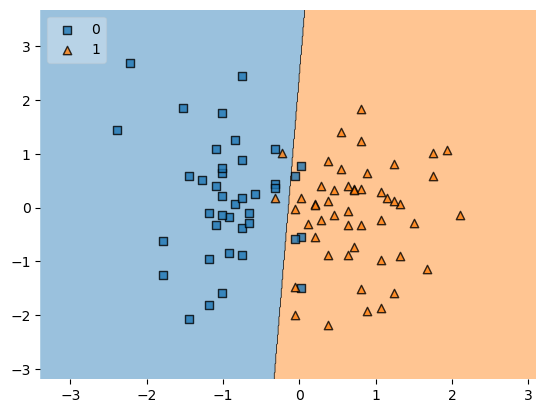

In [23]:
#decision boundry, visualizing  the data 

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)